In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from biosppy.signals import ecg
import numpy as np
# open the csv file
df = pd.read_csv('data/mit-bih/compiled_mit_bih.csv')
print(df.head())



       0      1      2      3      4      5      6      7      8      9  ...  \
0 -0.390 -0.395 -0.390 -0.405 -0.405 -0.400 -0.375 -0.380 -0.390 -0.395  ...   
1 -0.405 -0.410 -0.410 -0.410 -0.410 -0.400 -0.385 -0.370 -0.375 -0.360  ...   
2 -0.385 -0.365 -0.375 -0.380 -0.390 -0.385 -0.375 -0.360 -0.370 -0.380  ...   
3 -0.360 -0.360 -0.360 -0.360 -0.380 -0.390 -0.395 -0.375 -0.405 -0.450  ...   
4 -0.450 -0.445 -0.450 -0.455 -0.445 -0.450 -0.440 -0.430 -0.415 -0.425  ...   

    3591   3592   3593   3594   3595   3596   3597   3598   3599  label  
0 -0.405 -0.415 -0.405 -0.405 -0.405 -0.410 -0.425 -0.430 -0.420      N  
1 -0.380 -0.390 -0.375 -0.365 -0.365 -0.375 -0.375 -0.385 -0.385      N  
2 -0.360 -0.375 -0.370 -0.370 -0.360 -0.365 -0.375 -0.380 -0.385      N  
3 -0.415 -0.440 -0.445 -0.435 -0.425 -0.430 -0.440 -0.465 -0.460      N  
4 -0.220 -0.225 -0.235 -0.220 -0.220 -0.210 -0.230 -0.245 -0.245      N  

[5 rows x 3601 columns]


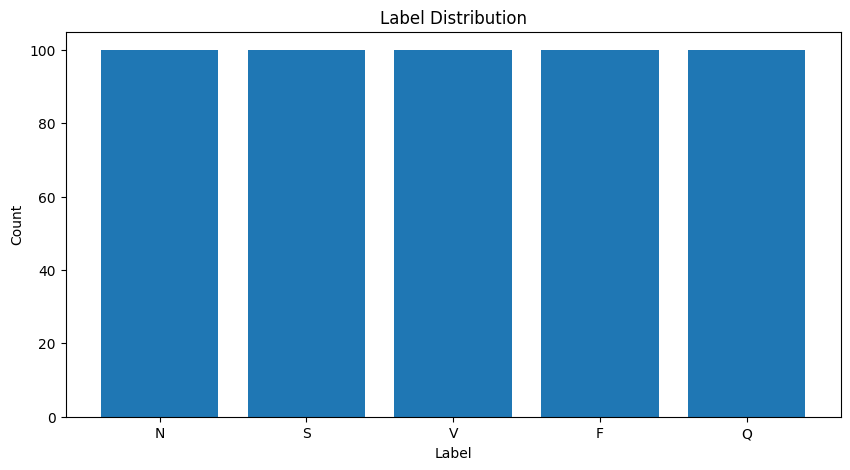

In [3]:
# plot the label distribution
labels = df.label.value_counts()

plt.figure(figsize=(10, 5))
plt.bar(labels.index, labels.values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

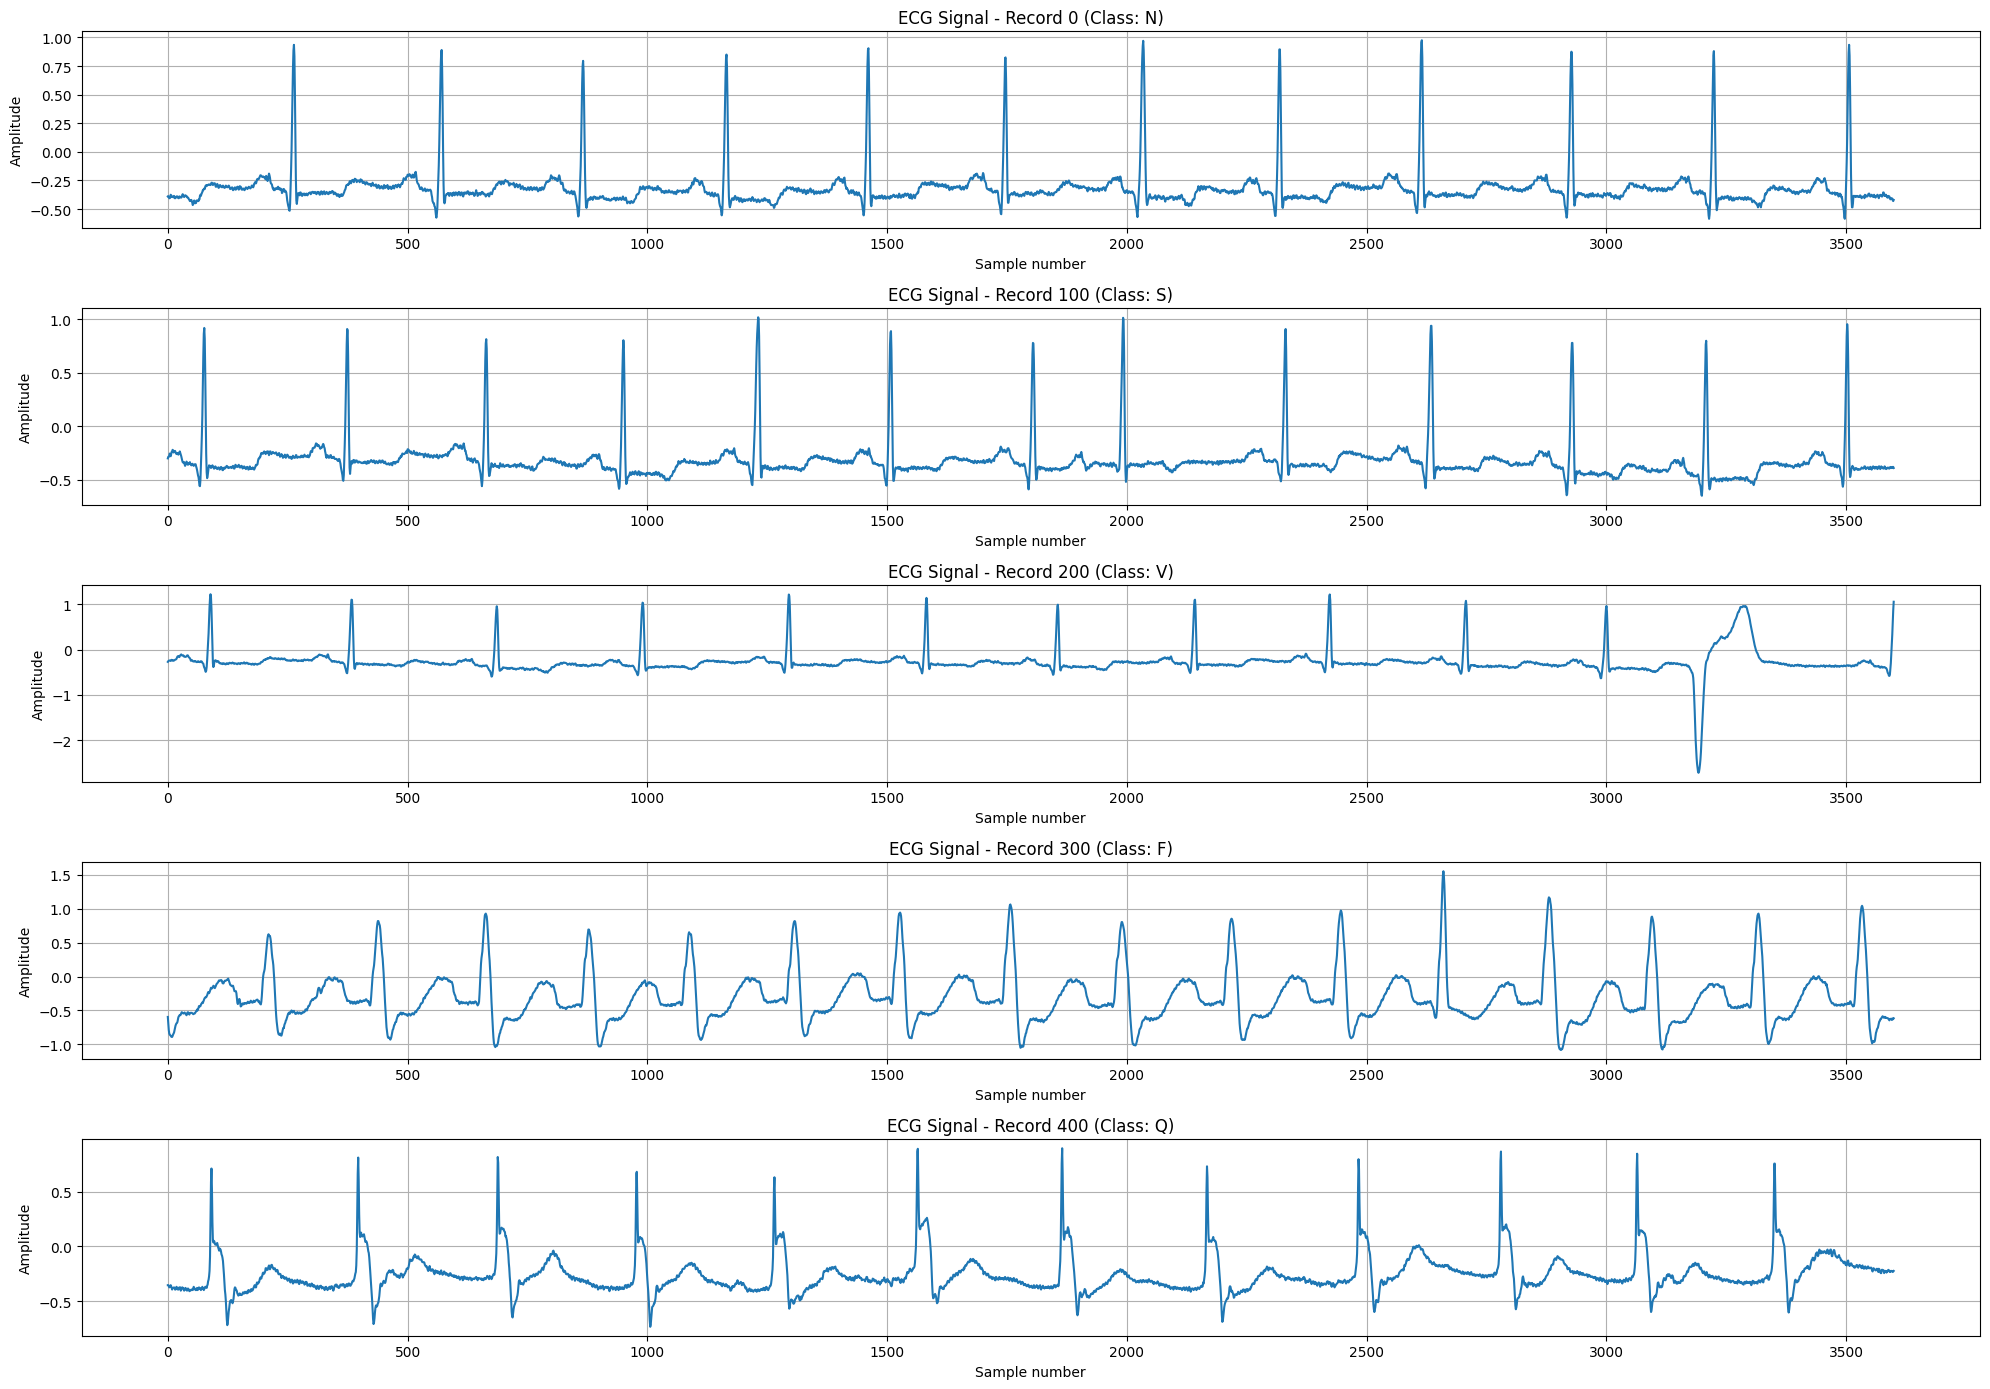

In [17]:

labels = df.label
ecg_signal = df.drop(columns=['label']).values
record_index = [0, 100, 200, 300, 400]

plt.figure(figsize=(20, 14))
for i, record_name in enumerate(record_index):
    plt.subplot(5,1,i+1)
    plt.plot(ecg_signal[record_name])
    plt.title(f'ECG Signal - Record {record_name} (Class: {df.iloc[record_name].label})')
    plt.xlabel('Sample number')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.grid(True)

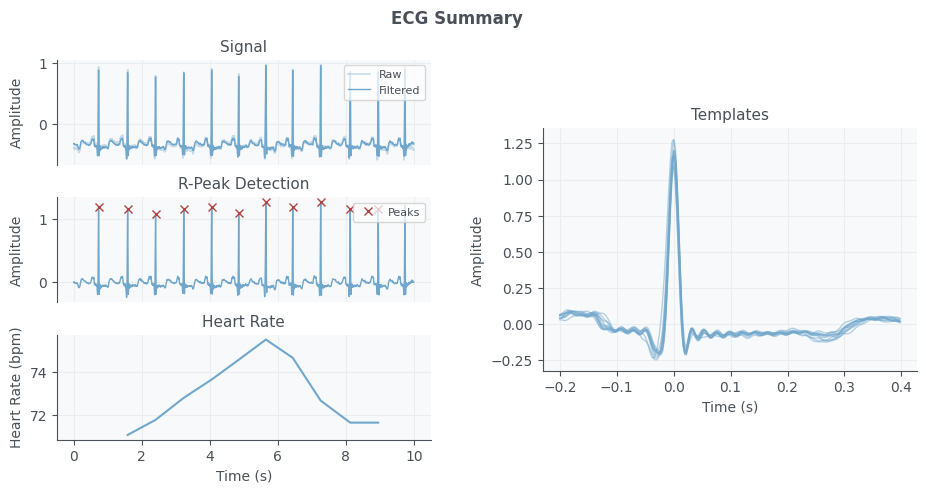

Available outputs: ['ts', 'filtered', 'rpeaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate']


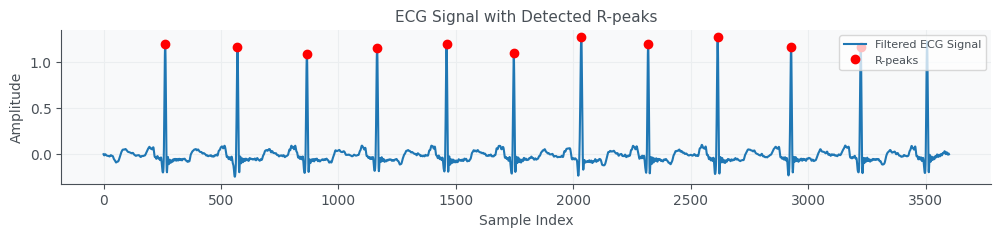

In [18]:
from biosppy.signals import ecg

# lets use pan tompkins to detect the afib

# Test the function with a single record

record_index = 0

out = ecg.ecg(signal=ecg_signal[record_index], sampling_rate=360, show=True)
# Print all available keys
print("Available outputs:", out.keys())

# Extract the processed signal and R-peak locations
filtered_ecg = out['filtered']
r_peaks = out['rpeaks']

# Plot the ECG signal with R-peaks
plt.figure(figsize=(12, 2))
plt.plot(filtered_ecg, label="Filtered ECG Signal")
plt.plot(r_peaks, filtered_ecg[r_peaks], "ro", label="R-peaks")  # Mark R-peaks with red dots
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("ECG Signal with Detected R-peaks")
plt.legend()
plt.show()


Record 0 (Label: N)
Dominant frequency: 1.20 Hz
Top 5 frequency components:
  1.20 Hz (magnitude: 89.02)
  4.90 Hz (magnitude: 79.16)
  6.10 Hz (magnitude: 70.85)
  2.40 Hz (magnitude: 57.05)
  2.50 Hz (magnitude: 49.79)

Record 100 (Label: S)
Dominant frequency: 6.20 Hz
Top 5 frequency components:
  6.20 Hz (magnitude: 82.57)
  1.30 Hz (magnitude: 81.62)
  5.10 Hz (magnitude: 63.52)
  0.20 Hz (magnitude: 60.55)
  16.90 Hz (magnitude: 60.04)

Record 200 (Label: V)
Dominant frequency: 1.20 Hz
Top 5 frequency components:
  1.20 Hz (magnitude: 158.35)
  2.50 Hz (magnitude: 135.58)
  1.10 Hz (magnitude: 110.92)
  2.60 Hz (magnitude: 98.48)
  4.80 Hz (magnitude: 95.73)

Record 300 (Label: F)
Dominant frequency: 3.20 Hz
Top 5 frequency components:
  3.20 Hz (magnitude: 353.35)
  1.60 Hz (magnitude: 335.08)
  3.40 Hz (magnitude: 262.44)
  5.00 Hz (magnitude: 221.94)
  3.30 Hz (magnitude: 218.72)

Record 400 (Label: Q)
Dominant frequency: 2.40 Hz
Top 5 frequency components:
  2.40 Hz (magnitu

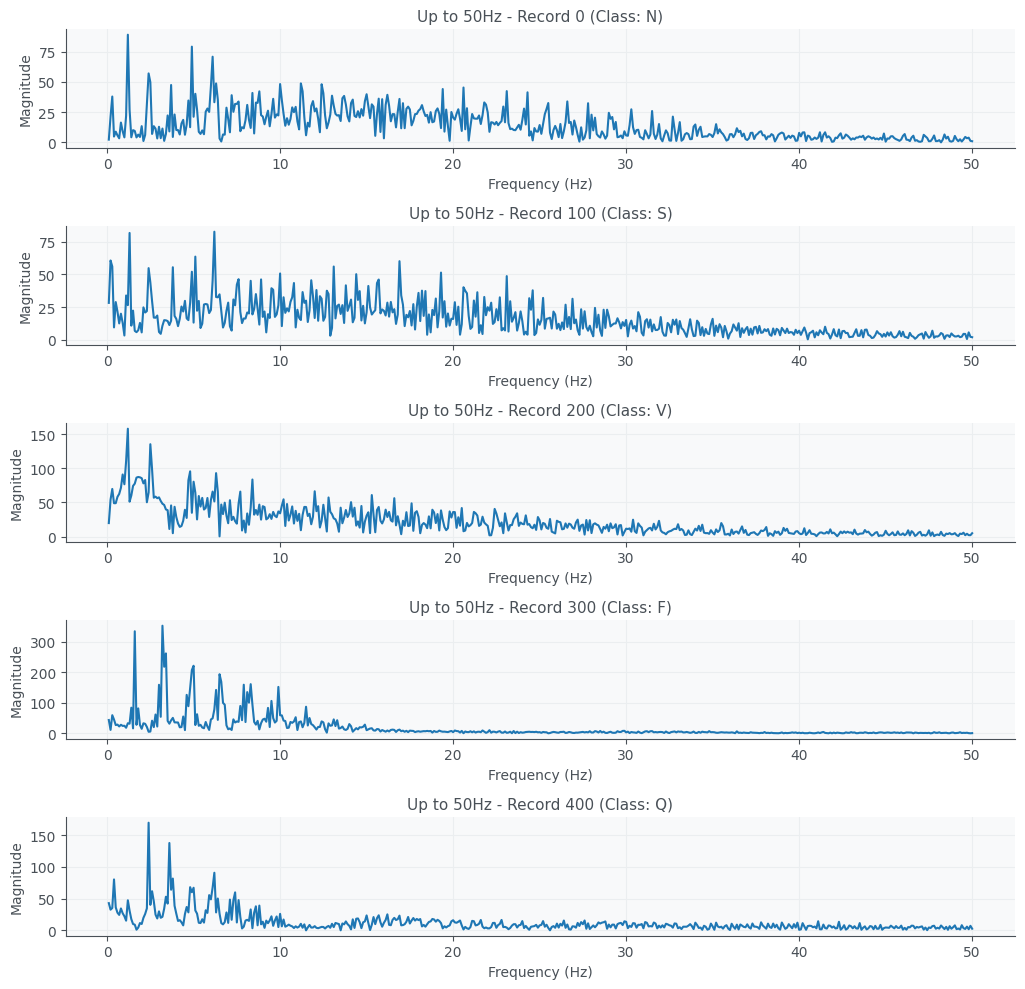


Frequency Analysis Results:
   dominant_freq label                                        top_5_freqs  \
0            1.2     N  [2.5, 2.4000000000000004, 6.1000000000000005, ...   
1            6.2     S  [16.900000000000002, 0.2, 5.1000000000000005, ...   
2            1.2     V  [4.800000000000001, 2.6, 1.1, 2.5, 1.200000000...   
3            3.2     F  [3.3000000000000003, 5.0, 3.4000000000000004, ...   
4            2.4     Q  [0.4, 3.8000000000000003, 6.2, 3.6, 2.40000000...   

                                    top_5_magnitudes  record_id  
0  [49.78676208527084, 57.04669659336995, 70.8539...          0  
1  [60.03680177380718, 60.54796093299331, 63.5165...        100  
2  [95.72940038944833, 98.47816345289179, 110.915...        200  
3  [218.72091147765587, 221.93834767863697, 262.4...        300  
4  [80.19181825009576, 81.56365651806883, 90.7073...        400  


In [21]:
def analyze_frequency(record_name, signals, label, ax1):
    
    # Perform FFT
    sampling_rate = 360  # Hz (typical for this dataset)
    n = len(signals)
    fft_result = np.fft.fft(signals)
    freqs = np.fft.fftfreq(n, d=1/sampling_rate)
    
    # Get positive frequencies only (first half)
    pos_freqs = freqs[:n//2]
    pos_fft = np.abs(fft_result)[:n//2]
    
    # Find dominant frequency (excluding DC component)
    dominant_freq_idx = np.argmax(pos_fft[1:]) + 1  # Skip first element (DC)
    dominant_freq = pos_freqs[dominant_freq_idx]
    
    print(f"\nRecord {record_name} (Label: {label})")
    print(f"Dominant frequency: {dominant_freq:.2f} Hz")
    print(f"Top 5 frequency components:")
    top_5_idx = np.argsort(pos_fft[1:])[-5:] + 1
    for idx in reversed(top_5_idx):
        print(f"  {pos_freqs[idx]:.2f} Hz (magnitude: {pos_fft[idx]:.2f})")
    
    # Plot 2: Zoomed in to lower frequencies
    max_freq = 50  # Show only up to 50 Hz
    freq_mask = pos_freqs <= max_freq
    ax1.plot(pos_freqs[freq_mask][1:], pos_fft[freq_mask][1:])
    ax1.set_title(f'Up to {max_freq}Hz - Record {record_name} (Class: {label})')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Magnitude')
    ax1.grid(True)
    
    return {
        'dominant_freq': dominant_freq,
        'label': label,
        'top_5_freqs': pos_freqs[top_5_idx],
        'top_5_magnitudes': pos_fft[top_5_idx]
    }

# Create a single figure for all plots
record_index = [0, 100, 200, 300, 400]
freq_results = []

fig = plt.figure(figsize=(20, 10))
for i, record_id in enumerate(record_index):
    # Create two subplots for each record
    # ax1 = plt.subplot(4, 2, 2*i + 1)
    ax2 = plt.subplot(5, 2, 2*i + 1)
    
    result = analyze_frequency(record_id, ecg_signal[record_id], df.iloc[record_id].label, ax2)
    result['record_id'] = record_id
    freq_results.append(result)

plt.tight_layout()
plt.show()

# Convert results to DataFrame if needed
freq_results_df = pd.DataFrame(freq_results)
print("\nFrequency Analysis Results:")
print(freq_results_df)